<a href="https://colab.research.google.com/github/Voonasanjana/-world-of-magic/blob/master/Task_5_Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author : Voona Sanjana


# Data Science & Business Analytics Internship


# GRIP - The Spark Foundation

# Objective :

<b>The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.</b>

# Decision Trees 
* <b>Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multi-output tasks. They are very powerful algorithms, capable of fitting complex datasets. Decision Trees split the instances into two or more homogeneous sets based on most significant splitter / differentiator in input variables.</b>

* <b>Decision Trees are also the fundamental components of Random Forests, which are among the most powerful Machine Learning algorithms available today.</b>

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('/IRIS.csv')

# New section

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
df.shape

(150, 5)

In [11]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
#check for missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [14]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


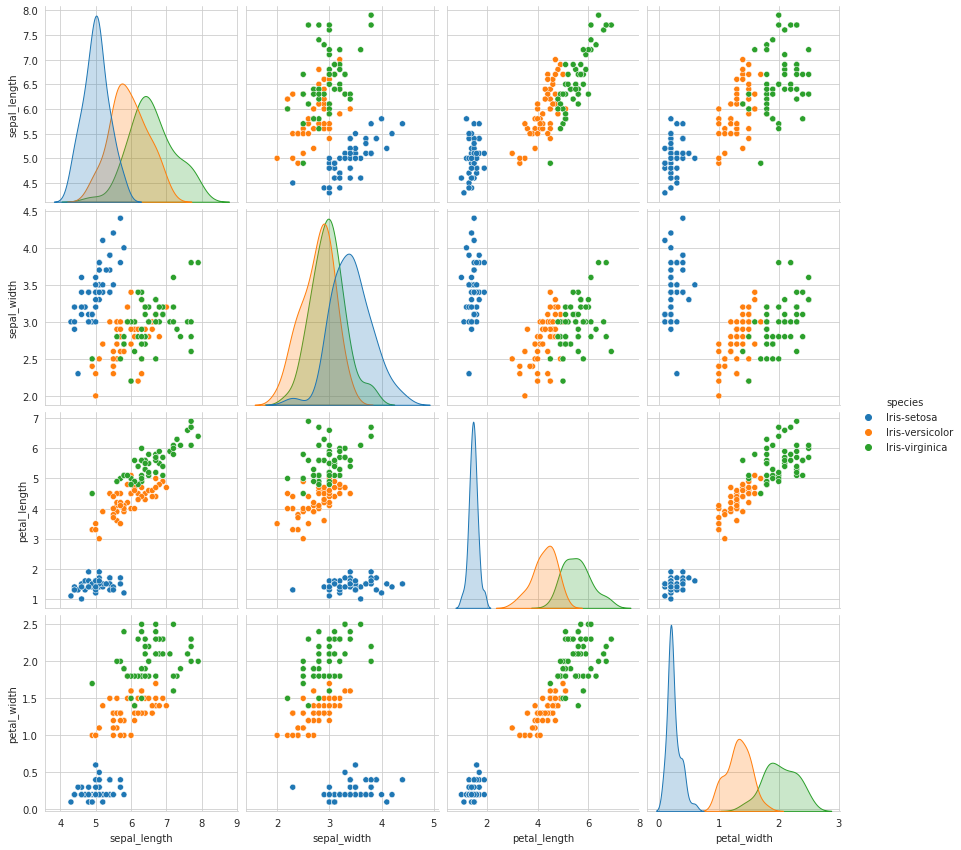

In [15]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="species",size=3);
plt.show()

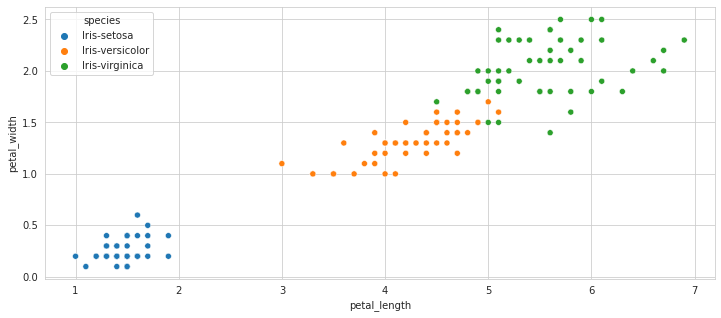

In [16]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='petal_length',y='petal_width',hue='species',data=df)
plt.show()
#scatterplot is used for numerical not in categorical

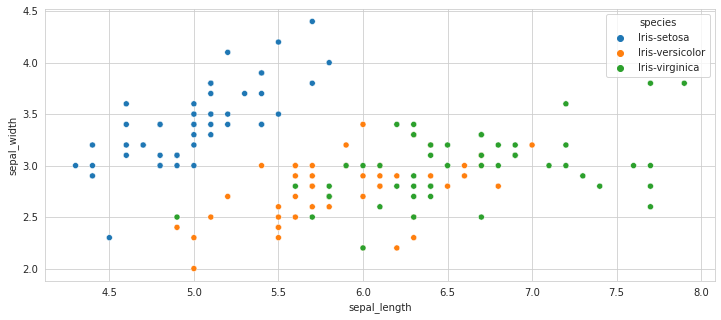

In [17]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=df)
plt.show()

In [ ]:
tree = df.corr()
tree

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Text(0.5, 1, 'Correlation between variables')

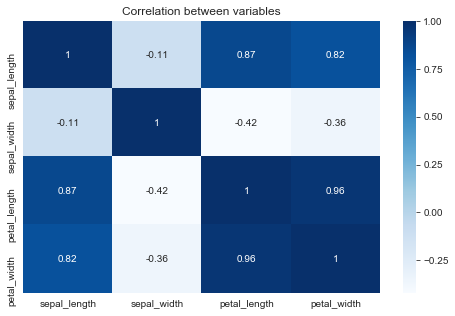

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(tree, cmap='Blues',annot=True)
plt.title('Correlation between variables')

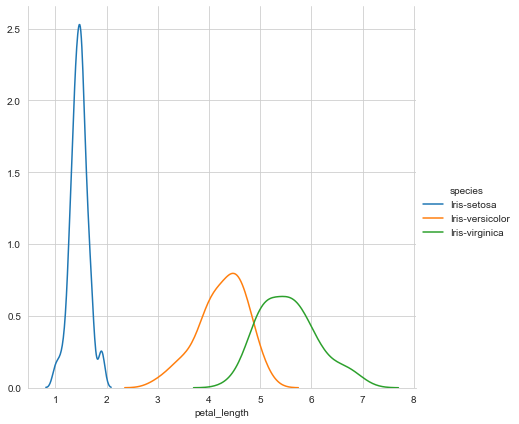

In [ ]:
sns.FacetGrid(df, hue="species", size=6) \
   .map(sns.kdeplot, 'petal_length') \
   .add_legend()

In [18]:
# Seperating to X and Y 
X = df.iloc[:, 0:4]
y = df.iloc[:, -1:]

In [19]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
y

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [21]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [22]:
from sklearn.tree import export_graphviz

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
# Predict for 1 observation
# A prediction is just the majority class of the instances in a leaf node.
y_pred=dt.predict(X_test)



In [28]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [30]:
import graphviz 

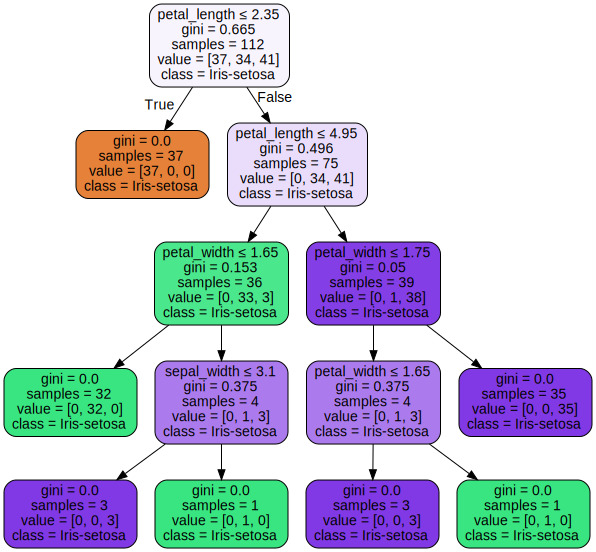

In [31]:
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns,  
                           class_names=y.species,  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [34]:
# Score returns the accuracy of the model

score = dt.score(X_test, y_test)
print("Accuracy:" , score)

Accuracy: 0.9736842105263158


In [35]:
important = pd.DataFrame({'feature':X_train.columns,'important':np.round(classifier.feature_importances_,3)})
important = important.sort_values('important',ascending=False)
important

NameError: ignored

In [36]:
from sklearn import tree

[Text(133.92000000000002, 195.696, 'X[2] <= 2.35\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(66.96000000000001, 108.72, 'X[3] <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(100.44000000000001, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'X[3] <= 1.75\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(234.36, 65.232, 'X[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.

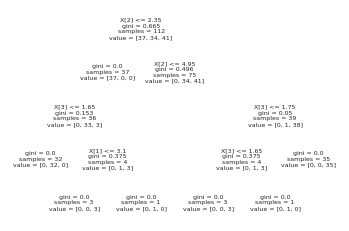

In [38]:
tree.plot_tree(dt) 

**Thank you ! **